In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/TamarGurfinkel/project_1/refs/heads/main/%D7%93%D7%90%D7%98%D7%94%20%D7%9C%D7%A4%D7%A8%D7%95%D7%99%D7%A7%D7%98.csv'
df = pd.read_csv(url)
df.columns


Index(['year', 'state', 'division', 'total_population', 'fss', 'homicide_rate',
       'firearm_homicide_rate', 'nonfirearm_homicide_rate', 'firearm_suicides',
       'total_suicides', 'firearm_homicides', 'nonfirearm_homicides',
       'total_homicides', 'white_fss', 'nonwhite_fss', 'nextyearfss',
       'nextyearnonwhitefss', 'nextyearwhitefss'],
      dtype='object')

In [2]:
df.head()
df.tail()

year          state            division  total_population       fss  \
3646  2020       Virginia      South Atlantic         8590563.0  0.580350   
3647  2020     Washington             Pacific         7693612.0  0.509901   
3648  2020  West Virginia      South Atlantic         1784787.0  0.621469   
3649  2020      Wisconsin  East North Central         5832655.0  0.510393   
3650  2020        Wyoming            Mountain          582328.0  0.703297   

     homicide_rate firearm_homicide_rate nonfirearm_homicide_rate  \
3646   6.181201395           5.121899461              1.059301934   
3647   4.185290342           2.742534976              1.442755366   
3648   6.387316806           4.874531247              1.512785559   
3649   5.726380182           4.337647264              1.388732918   
3650    4.29311316           3.091041475              1.202071685   

      firearm_suicides  total_suicides  firearm_homicides  \
3646               697            1201              440.0   
3647               618            1212              211.0   
3648               220             354               87.0   
3649               442             866              253.0   
3650               128             182               18.0   

      nonfirearm_homicides  total_homicides  white_fss  nonwhite_fss  \
3646                  91.0              531   0.594540      0.514151   
3647                 111.0              322   0.531191      0.363636   
3648                  27.0              114   0.626113      0.529412   
3649                  81.0              334   0.516169      0.435484   
3650                   7.0               25   0.706215      0.600000   

      nextyearfss  nextyearnonwhitefss  nextyearwhitefss  
3646          NaN                  NaN               NaN  
3647          NaN                  NaN               NaN  
3648          NaN                  NaN               NaN  
3649          NaN                  NaN               NaN  
3650          NaN                  NaN               NaN

In [3]:
df.shape

(3651, 18)

In [4]:
df.dtypes

year                          int64
state                        object
division                     object
total_population            float64
fss                         float64
homicide_rate                object
firearm_homicide_rate        object
nonfirearm_homicide_rate     object
firearm_suicides              int64
total_suicides                int64
firearm_homicides           float64
nonfirearm_homicides        float64
total_homicides               int64
white_fss                   float64
nonwhite_fss                float64
nextyearfss                 float64
nextyearnonwhitefss         float64
nextyearwhitefss            float64
dtype: object

In [5]:
cols_to_convert = ['homicide_rate', 'firearm_homicide_rate', 'nonfirearm_homicide_rate']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')


In [6]:
df.dtypes

year                          int64
state                        object
division                     object
total_population            float64
fss                         float64
homicide_rate               float64
firearm_homicide_rate       float64
nonfirearm_homicide_rate    float64
firearm_suicides              int64
total_suicides                int64
firearm_homicides           float64
nonfirearm_homicides        float64
total_homicides               int64
white_fss                   float64
nonwhite_fss                float64
nextyearfss                 float64
nextyearnonwhitefss         float64
nextyearwhitefss            float64
dtype: object

<div dir="rtl">
# מבוא תיאורטי

## מהו מדד FSS ולמה הוא משמש?

מדד ה-FSS (Firearm Suicide Share) הוא מדד עקיף להערכת שיעור החזקת נשק חם בבתים.  
המדד מחושב על ידי חלוקת מספר ההתאבדויות שבוצעו באמצעות נשק חם בסך כל מקרי ההתאבדויות במדינה ובשנה נתונה.

לדוגמה:  
אם במדינה מסוימת התרחשו 100 מקרי התאבדות, ו-40 מתוכם בוצעו באמצעות נשק חם, ערך המדד יהיה 0.4 (כלומר, 40%).

מדד זה מבוסס על ההנחה שנשק חם משמש יותר במקרי התאבדות כאשר הוא נגיש בבתים.  
בנוסף, זהו מדד מקובל ואמין מאחר שהוא מתבסס על נתונים רשמיים ואובייקטיביים, ולא על סקרים העלולים להיות מושפעים מהטיות חברתיות או פוליטיות.

---

## סקירה תמציתית של המאמר

הניתוח הנוכחי מבוסס על המאמר:  
**"State-level household gun ownership proxy dataset, 1949–2020" (Kang & Rasich, 2023)**.

המאמר מציג מאגר נתונים היסטורי רחב היקף, המאפשר להעריך את שיעור החזקת הנשק החם בבתים בארה"ב ברמת המדינות לאורך יותר מ-70 שנה.  
מאגר הנתונים נבנה במטרה לסגור פערים היסטוריים במידע, ולהבין כיצד השתנתה תרבות החזקת הנשק והשפעותיה החברתיות והבריאותיות.

המאמר מצביע על כך שערכי מדד FSS נמצאים בקשר חזק עם שיעורי מקרי הרצח בנשק חם ושיעורי ההתאבדויות.  
לכן, מדד זה נחשב לאינדיקציה אמינה להערכת שיעור החזקת נשק במדינות השונות, גם בעשורים שבהם לא היו נתונים ישירים.

---

**במחקר הנוכחי נבדוק האם המסקנות של Kang and Rasich (2023) מתקיימות גם בניתוח הנתונים שבידינו.**

---

להרחבה, ניתן לעיין במאמר המלא בקישור הבא:  
[לצפייה במאמר (Kang & Rasich, 2023)](https://doi.org/10.1016/j.dib.2023.109548)
</div>

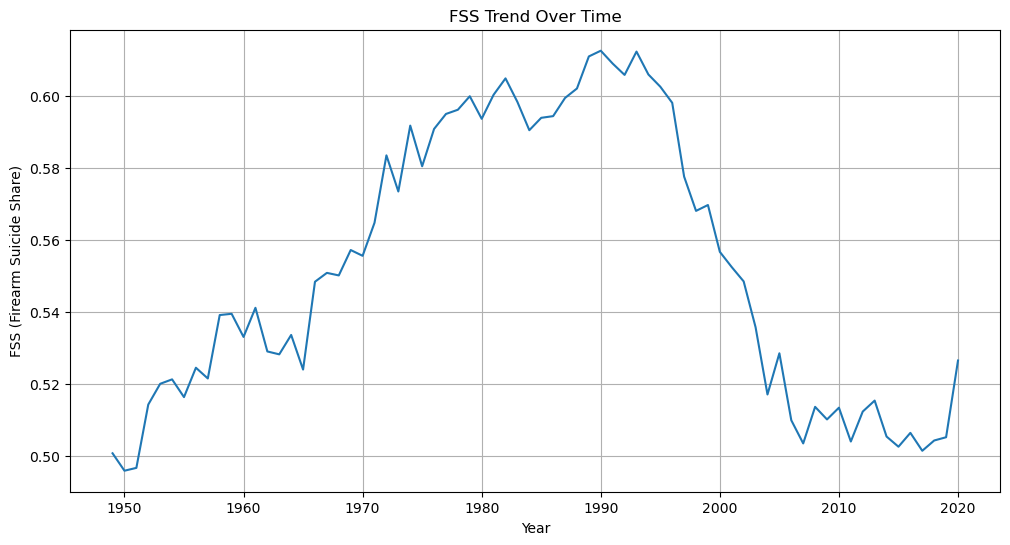

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='fss', errorbar=None)
plt.title("FSS Trend Over Time")
plt.xlabel("Year")
plt.ylabel("FSS (Firearm Suicide Share)")
plt.grid(True)
plt.show()


מגמת שיעור החזקת נשק (FSS) לאורך השנים:

נצפתה עלייה ברורה בשיעור החזקת נשק משנות ה-50 ועד תחילת שנות ה-90.

לאחר מכן ניכרת ירידה משמעותית בשיעור החזקת הנשק בעשורים האחרונים.

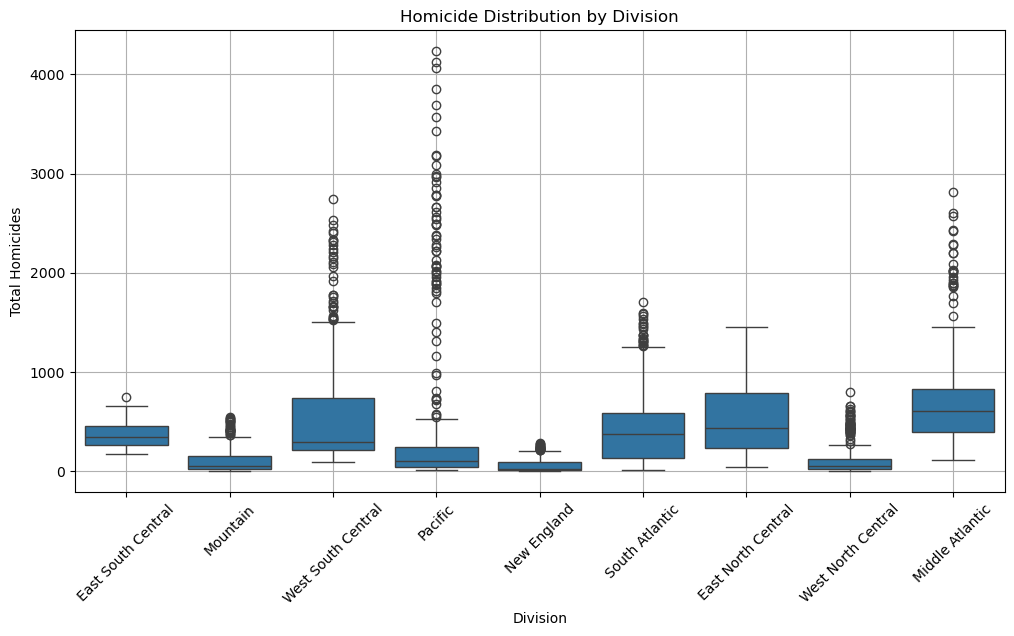

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='division', y='total_homicides')
plt.title("Homicide Distribution by Division")
plt.xlabel("Division")
plt.ylabel("Total Homicides")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

התפלגות מקרי הרצח לפי אזורים (division):

האזורים עם שיעור מקרי הרצח הגבוה ביותר:
West South Central (כולל טקסס), South Atlantic, Middle Atlantic.

האזורים עם השיעורים הנמוכים ביותר:
New England ו-Mountain.

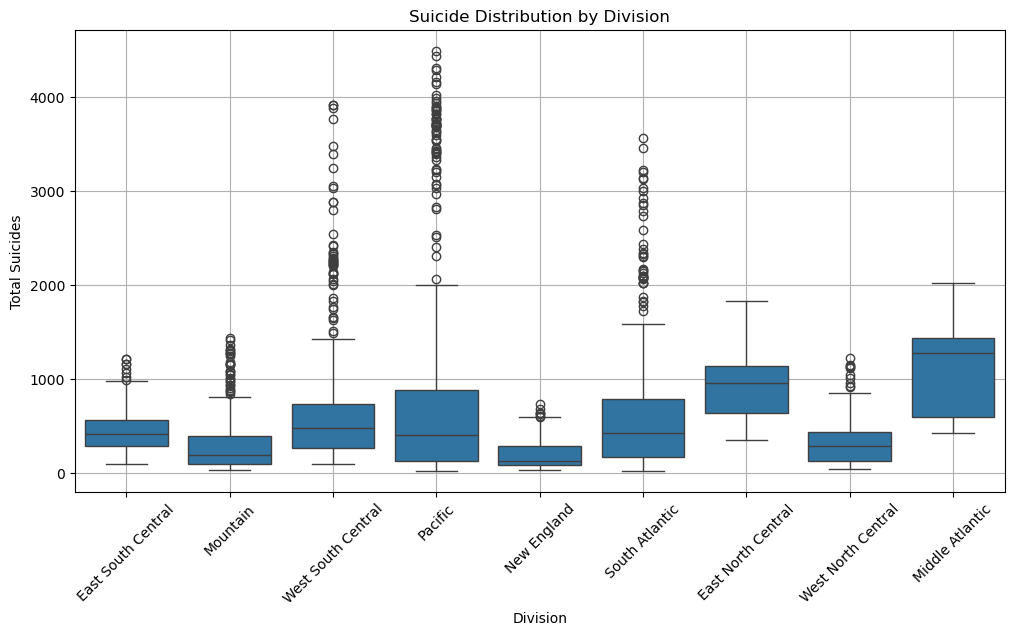

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='division', y='total_suicides')
plt.title("Suicide Distribution by Division")
plt.xlabel("Division")
plt.ylabel("Total Suicides")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


התפלגות מקרי ההתאבדות לפי אזורים:

אזור ה-Pacific מציג ערכים גבוהים יחסית.

אזור ה-New England שומר על שיעורים נמוכים יחסית.

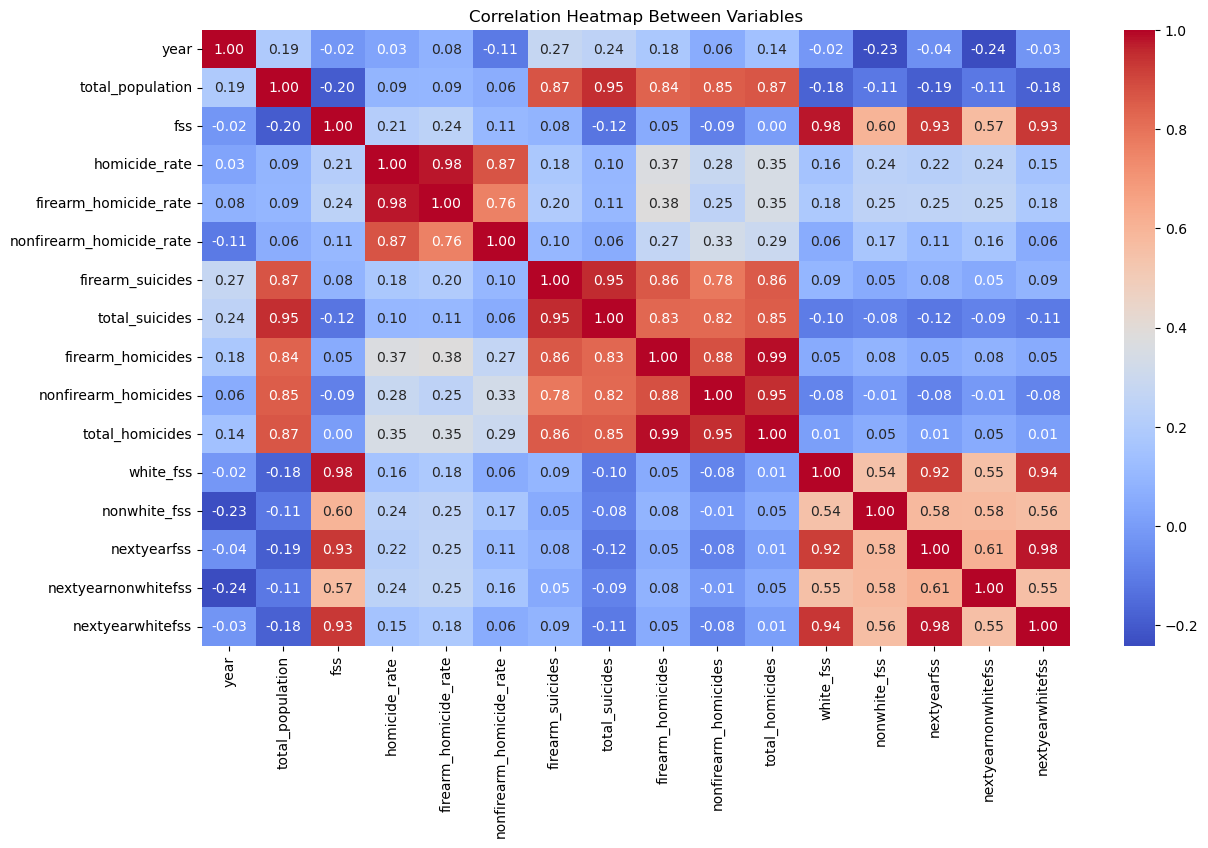

In [14]:
plt.figure(figsize=(14, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap Between Variables")
plt.show()

<div dir="rtl">

### 🔥 מפת חום של קורלציות:

- נמצא קשר **חזק מאוד** בין `FSS` לבין `white_fss` (0.98).
- נמצא קשר **חזק גם בין `FSS` ל-`nextyearfss`**, מה שמעיד על **השפעה אפשרית לטווח ארוך**.
- נמצא קשר **בינוני בלבד** בין `FSS` לשיעורי רצח עם נשק חם (`firearm_homicide_rate`) – כ-0.08. עם זאת, זוהי **קורלציה גולמית בלבד**, ונדרש ניתוח רגרסיה להסקת מסקנות.

---

### 📈 ממצאים מניתוחי רגרסיה:

#### 🔹 קשר בין `FSS` לשיעור הרצח (`homicide_rate`):
- המודל **מובהק מאוד** (P-Value < 0.0001)
- **המקדם חיובי**: עלייה של יחידת FSS אחת → עלייה של 7.46 מקרי רצח ל-100,000 תושבים.
- **R-squared נמוך**: כ-0.046 → FSS מסביר רק כ-4.6% מהשונות בשיעורי הרצח.
- ➕ יש קשר, אבל יש כנראה **משתנים חשובים נוספים** שמשפיעים.

#### 🔹 קשר בין `FSS` לשיעור ההתאבדויות (`total_suicides`):
- גם כאן המודל **מובהק מאוד** (P-Value < 0.0001)
- **המקדם שלילי**: ככל שה-FSS גבוה יותר → שיעור מקרי ההתאבדות הכללי דווקא **יורד**.
- **R-squared נמוך מאוד**: כ-0.015 → הקשר קיים אך **השפעה חלשה יחסית**.

---

### 📌 מסקנות בשלב זה:

- יש **קשר מובהק** בין `FSS` לשיעורי הרצח, אך **היכולת ההסברית של המודל מוגבלת** (R-squared נמוך).
- לעומת זאת, בניתוח על התאבדויות: ככל שה־FSS גבוה יותר, נראה שההתאבדויות מתבצעות יותר באמצעות נשק חם – אך **מספר ההתאבדויות הכולל אינו בהכרח עולה**.
- ייתכן שההשפעה של FSS **חזקה יותר בטווח הארוך** (למשל דרך `nextyearfss`), או שקיימים **הבדלים בין אזורים שונים** (למשל לפי Division) שדורשים ניתוח נוסף.

</div>


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      3651 non-null   int64  
 1   state                     3651 non-null   object 
 2   division                  3651 non-null   object 
 3   total_population          3650 non-null   float64
 4   fss                       3651 non-null   float64
 5   homicide_rate             3650 non-null   float64
 6   firearm_homicide_rate     3649 non-null   float64
 7   nonfirearm_homicide_rate  3649 non-null   float64
 8   firearm_suicides          3651 non-null   int64  
 9   total_suicides            3651 non-null   int64  
 10  firearm_homicides         3650 non-null   float64
 11  nonfirearm_homicides      3650 non-null   float64
 12  total_homicides           3651 non-null   int64  
 13  white_fss                 3644 non-null   float64
 14  nonwhite

<Axes: >

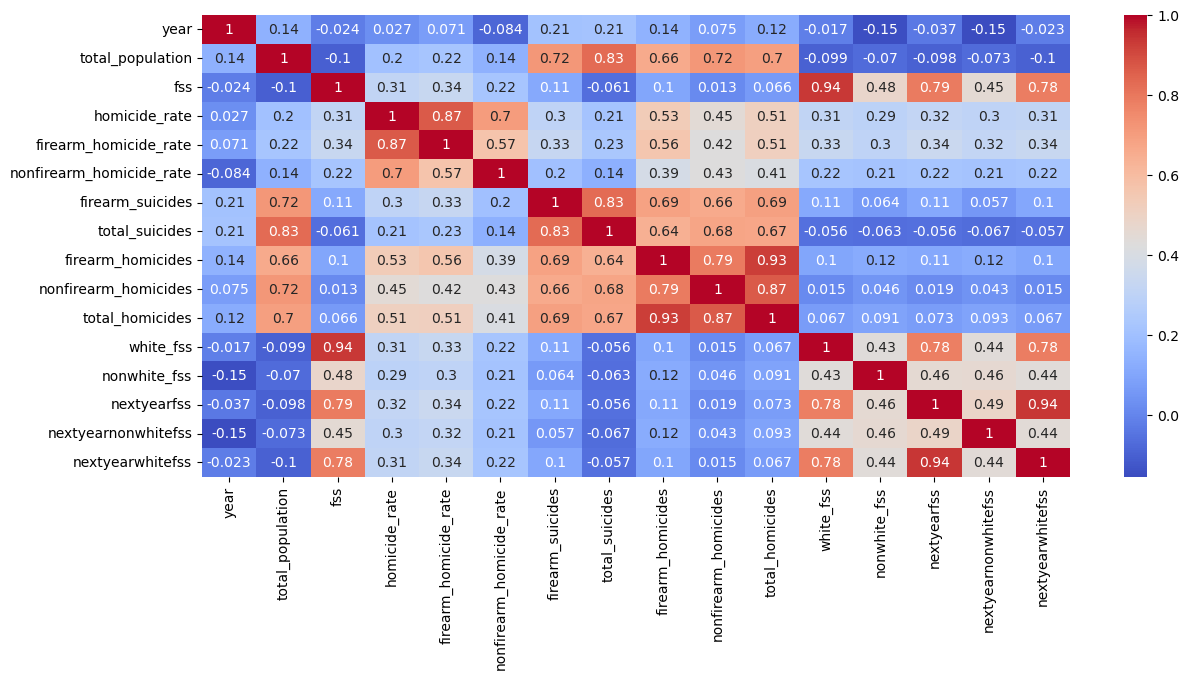

In [17]:
plt.figure(figsize=(14,6))
numeric_df = df.select_dtypes(include='number') 
correlation_matrix = numeric_df.corr(method='kendall').round(3)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')

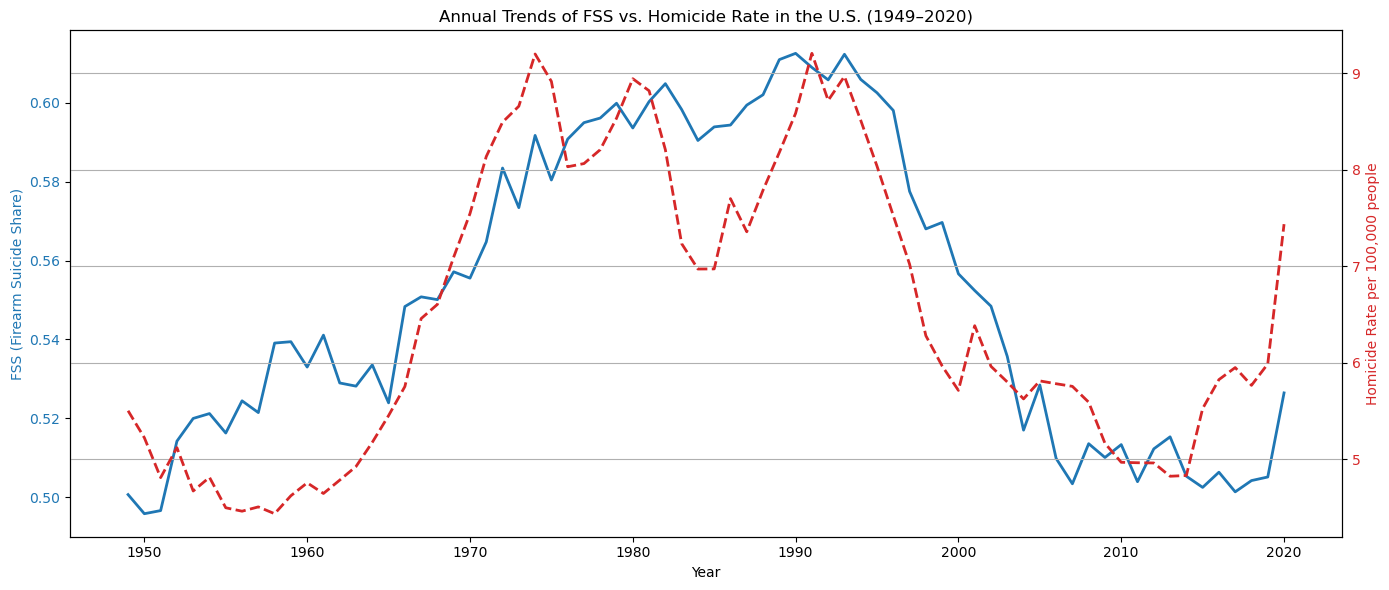

In [18]:
# Convert homicide_rate to numeric in case it's stored as string
df["homicide_rate"] = pd.to_numeric(df["homicide_rate"], errors='coerce')

# Calculate yearly averages
yearly_avg = df.groupby("year")[["fss", "homicide_rate"]].mean().reset_index()

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Left Y-axis: FSS
color = 'tab:blue'
ax1.set_xlabel("Year")
ax1.set_ylabel("FSS (Firearm Suicide Share)", color=color)
ax1.plot(yearly_avg["year"], yearly_avg["fss"], color=color, label="FSS", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)

# Right Y-axis: Homicide Rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("Homicide Rate per 100,000 people", color=color)
ax2.plot(yearly_avg["year"], yearly_avg["homicide_rate"], color=color, label="Homicide Rate", linewidth=2, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title("Annual Trends of FSS vs. Homicide Rate in the U.S. (1949–2020)")
fig.tight_layout()
plt.grid(True)
plt.show()

<div dir="rtl">

### 📉 מסקנה מתוך ניתוח מגמות FSS מול שיעורי רצח (1949–2020):

מבט היסטורי על המגמות מראה כי **בין שנות ה־60 לשנות ה־90**, חלה עלייה חדה גם בשיעור ההתאבדויות שנעשו באמצעות נשק חם (`FSS`), וגם בשיעור הרצח באוכלוסייה הכללית.

- החל משנות ה־90 ניכרת **ירידה מתמשכת ב-FSS**, אשר מלווה גם ב**ירידה מקבילה בשיעור מקרי הרצח**. מגמה זו עשויה להעיד על קשר עקיף או מבני בין זמינות נשק חם לבין שיעורי אלימות קטלנית בחברה.

- לקראת סוף התקופה (שנות ה־2010–2020), ניכרת **עלייה מחדש בשני המדדים**, מה שמחזק את האפשרות של **קשר דינאמי** בין FSS לבין מגמות אלימות חמורה.

🧠 נתון זה מחזק את טענת החוקרים כי `FSS` עשוי לשמש **אינדיקטור עקיף** לרמת החשיפה או הנגישות לנשק חם באוכלוסייה, שיכולה להשפיע גם על שיעור מקרי הרצח.

</div>


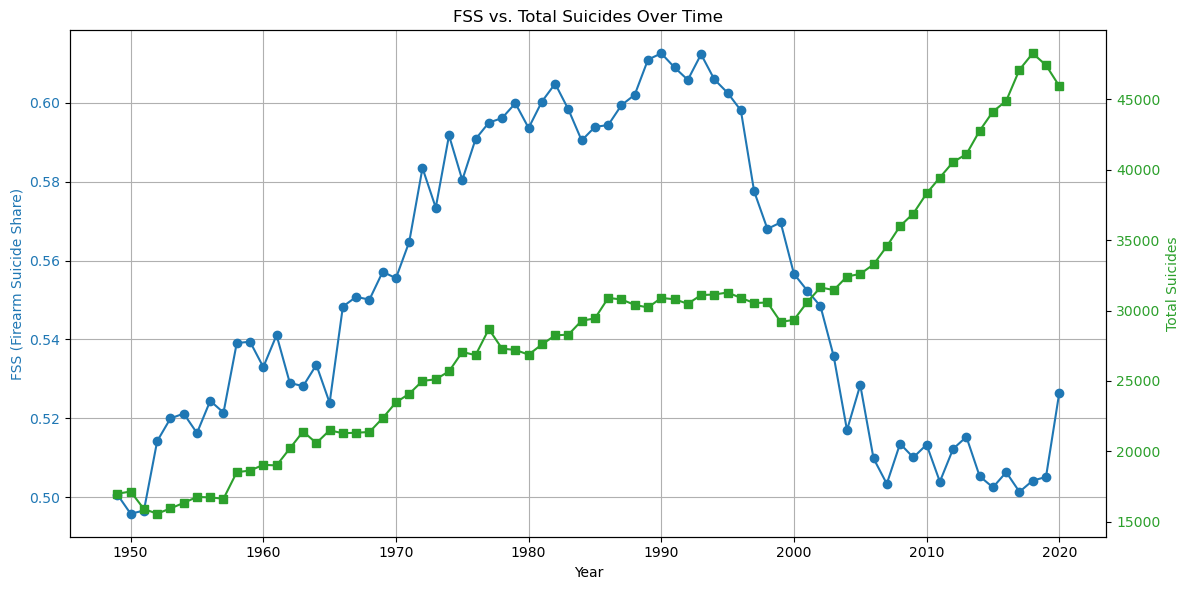

In [20]:


# סיכום לפי שנה
summary = df.groupby('year').agg({
    'fss': 'mean',
    'total_suicides': 'sum'
}).reset_index()

# ציור שני המשתנים באותו גרף עם שני צירים Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# ציר שמאל - FSS
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('FSS (Firearm Suicide Share)', color=color)
ax1.plot(summary['year'], summary['fss'], color=color, marker='o', label='FSS')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# ציר ימין - Total Suicides
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Total Suicides', color=color)
ax2.plot(summary['year'], summary['total_suicides'], color=color, marker='s', label='Total Suicides')
ax2.tick_params(axis='y', labelcolor=color)

# כותרת
plt.title("FSS vs. Total Suicides Over Time")
fig.tight_layout()
plt.show()


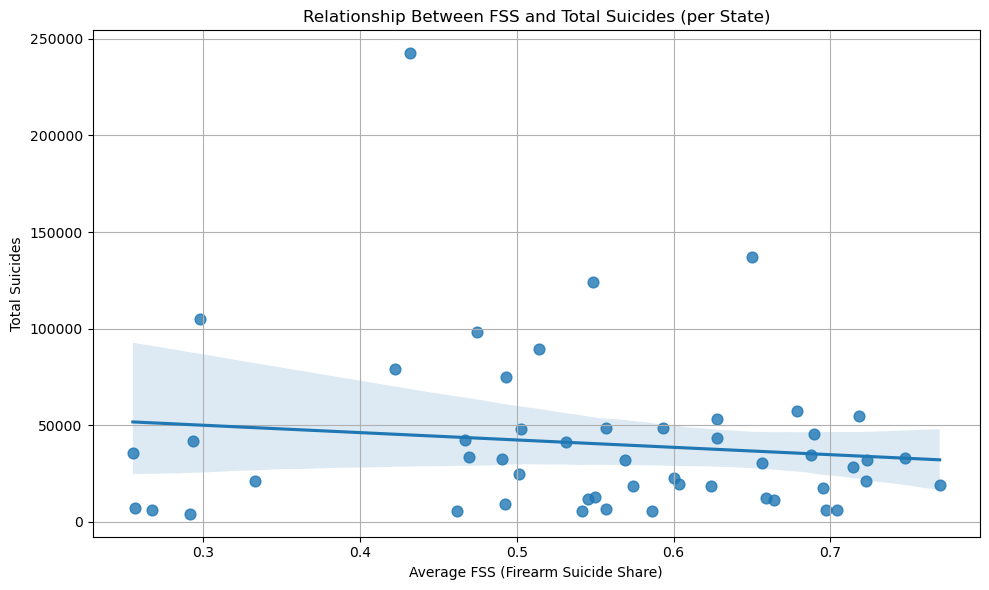

In [21]:

# סיכום לכל מדינה
state_summary = df.groupby('state').agg({
    'fss': 'mean',
    'total_suicides': 'sum'
}).reset_index()

# ציור גרף פיזור
plt.figure(figsize=(10, 6))
sns.regplot(data=state_summary, x='fss', y='total_suicides', scatter_kws={'s': 60})
plt.title("Relationship Between FSS and Total Suicides (per State)")
plt.xlabel("Average FSS (Firearm Suicide Share)")
plt.ylabel("Total Suicides")
plt.grid(True)
plt.tight_layout()
plt.show()


<div dir="rtl">

### 🧠 מסקנה: הקשר בין FSS למקרי התאבדות

מניתוח הגרפים עולה כי קיים פער בין מגמות ה־FSS לבין כמות מקרי ההתאבדות לאורך השנים:

1. **הגרף הדו-צירי (FSS מול סך מקרי ההתאבדות)** מראה כי בעוד ששיעור השימוש בנשק חם בביצוע התאבדויות (FSS) ירד באופן ברור מאז שנות ה־90, כמות מקרי ההתאבדות הכוללת דווקא עלתה באותו זמן.

2. **גרף הפיזור לפי מדינות** מציג קו רגרסיה כמעט שטוח, המעיד על היעדר קשר מובהק בין ממוצע FSS במדינה לבין מספר מקרי ההתאבדות הכולל.

3. **פירוש אפשרי:** הירידה ב־FSS משקפת ככל הנראה שינוי באמצעי הביצוע – כלומר פחות התאבדויות בנשק – אך לא ירידה בעצם התופעה. כלומר, ייתכן שהמאבק בכלי נשק לא בהכרח מפחית את ההתאבדויות, אלא רק משנה את האופן שבו הן מבוצעות.

נראה שההתאבדויות מתבצעות יותר באמצעות נשק חם – אך מספר ההתאבדויות הכולל אינו בהכרח עולה.
</div>

</div>


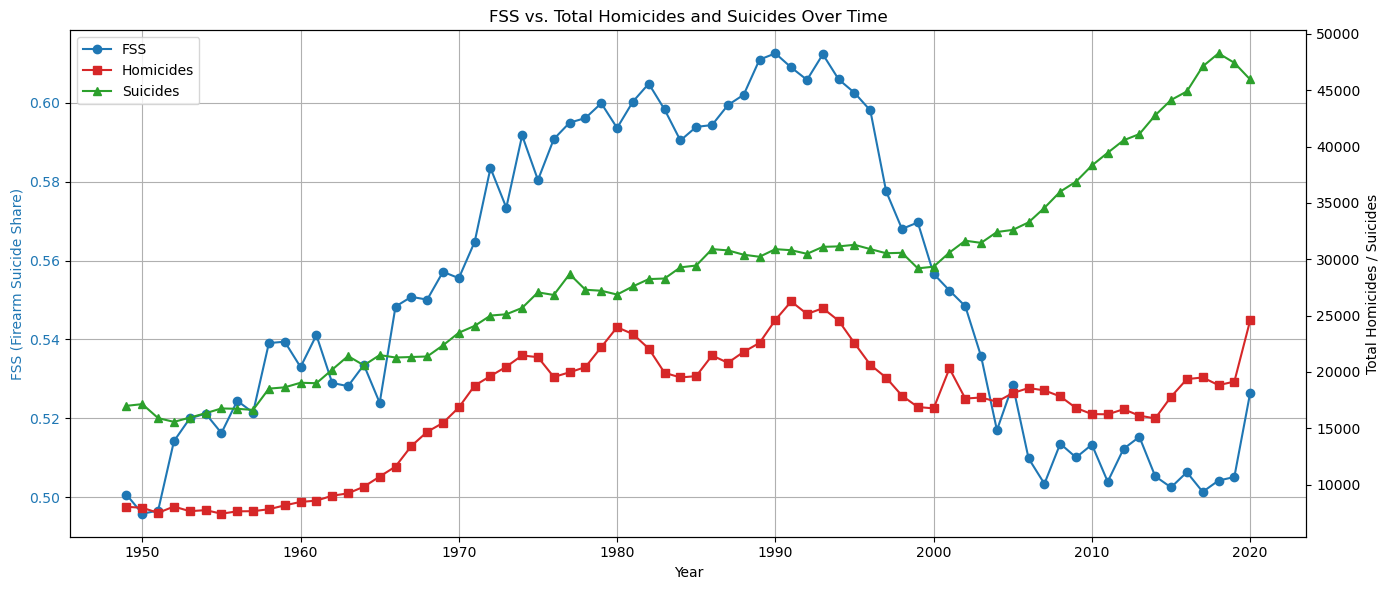

In [23]:


# סיכום לפי שנה
summary = df.groupby('year').agg({
    'fss': 'mean',
    'total_homicides': 'sum',
    'total_suicides': 'sum'
}).reset_index()

# ציור הגרף
fig, ax1 = plt.subplots(figsize=(14, 6))

# FSS בציר שמאלי
color1 = 'tab:blue'
ax1.set_xlabel("Year")
ax1.set_ylabel("FSS (Firearm Suicide Share)", color=color1)
ax1.plot(summary['year'], summary['fss'], color=color1, marker='o', label="FSS")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True)

# יצירת ציר ימני
ax2 = ax1.twinx()

# Total Homicides בציר ימני
color2 = 'tab:red'
ax2.plot(summary['year'], summary['total_homicides'], color=color2, marker='s', label="Homicides")

# Total Suicides גם כן בציר ימני
color3 = 'tab:green'
ax2.plot(summary['year'], summary['total_suicides'], color=color3, marker='^', label="Suicides")

ax2.set_ylabel("Total Homicides / Suicides", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# כותרת וקטגוריות
plt.title("FSS vs. Total Homicides and Suicides Over Time")

# אגדה משולבת
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()


<div dir="rtl">
    🧠 מסקנה ראשונית מהגרף המשולב ( מול רציחות והתאבדויות לאורך השנים):
מניתוח חזותי של מגמות לאורך השנים, ניתן לזהות את ההתנהגות הבאה:

שיעור ה-FSS (כלומר שיעור ההתאבדויות שבוצעו באמצעות נשק חם מתוך כלל ההתאבדויות) מציג מגמה ברורה של עלייה הדרגתית עד תחילת שנות ה-90, ואחריה ירידה הדרגתית.

כמות מקרי הרצח הכוללת (Total Homicides) עוקבת אחר מגמה דומה: עלייה עד שנות ה-90 ואז ירידה.
המגמה המקבילה הזו עשויה להעיד על קשר חיובי בין רמת החזקת הנשק לבין שיעור מקרי הרצח.

כמות מקרי ההתאבדות הכוללת (Total Suicides) שומרת על יציבות יחסית לאורך השנים, עם תנודות מתונות, שאינן מציגות קשר ברור ל-FSS.

🔎 פרשנות אפשרית:

הנתונים מחזקים את המסקנה שנמצאה גם במאמר : ככל ששיעור ההחזקת נשק  עולה, כך ייתכן שהסיכון למקרי רצח גדל.

לעומת זאת, לא נמצא קשר מובהק או עקבי בין לבין כמות ההתאבדויות הכוללת – ייתכן שהנשק משפיע רק על אופן הביצוע ולא על עצם ההתרחשות של ההתאבדות.
</div>

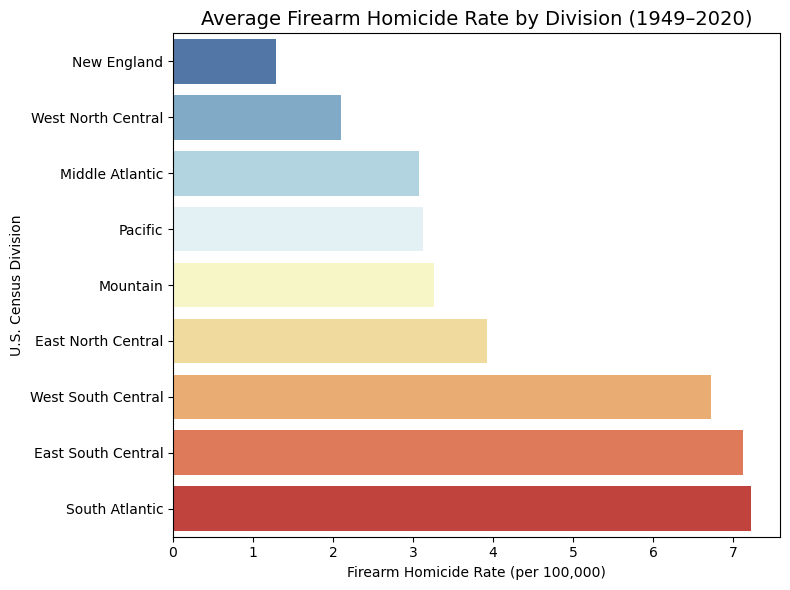

In [25]:

# חישוב ממוצע שיעור רצח לפי Division
division_avg = df.groupby('division', as_index=False)['firearm_homicide_rate'].mean()

# מיון לפי בטיחות (מהנמוך לגבוה)
division_sorted = division_avg.sort_values('firearm_homicide_rate')

# גרף עמודות אופקי עם hue למניעת האזהרה
plt.figure(figsize=(8, 6))
sns.barplot(
    x='firearm_homicide_rate',
    y='division',
    data=division_sorted,
    palette='RdYlBu_r',
    hue='division',      # פתרון לבעיה
    legend=False         # לא צריך מקרא כי הוא כפול למשתנה y
)

plt.title('Average Firearm Homicide Rate by Division (1949–2020)', fontsize=14)
plt.xlabel('Firearm Homicide Rate (per 100,000)')
plt.ylabel('U.S. Census Division')
plt.tight_layout()
plt.show()


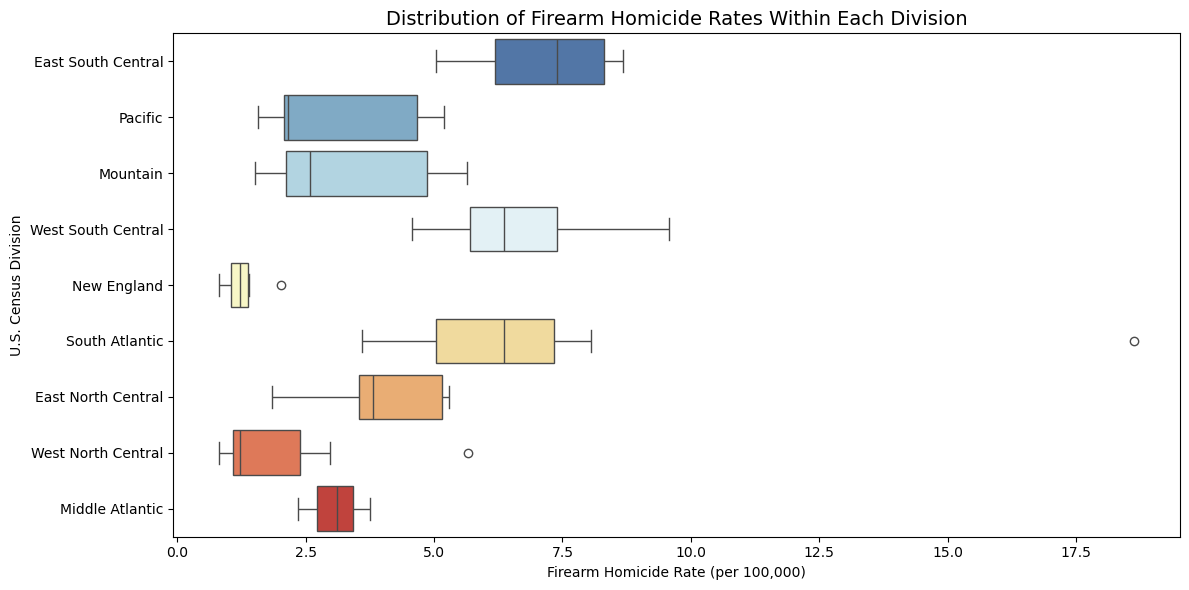

In [26]:
state_division_avg = df.groupby(['state', 'division'], as_index=False)['firearm_homicide_rate'].mean()
plt.figure(figsize=(12, 6))
sns.boxplot(data=state_division_avg, 
            x='firearm_homicide_rate', 
            y='division', 
            hue='division',         # מונע את האזהרה
            palette='RdYlBu_r',
            legend=False)           # לא צריך מקרא כי זה כבר מופיע על הציר

plt.title('Distribution of Firearm Homicide Rates Within Each Division', fontsize=14)
plt.xlabel('Firearm Homicide Rate (per 100,000)')
plt.ylabel('U.S. Census Division')
plt.tight_layout()
plt.show()


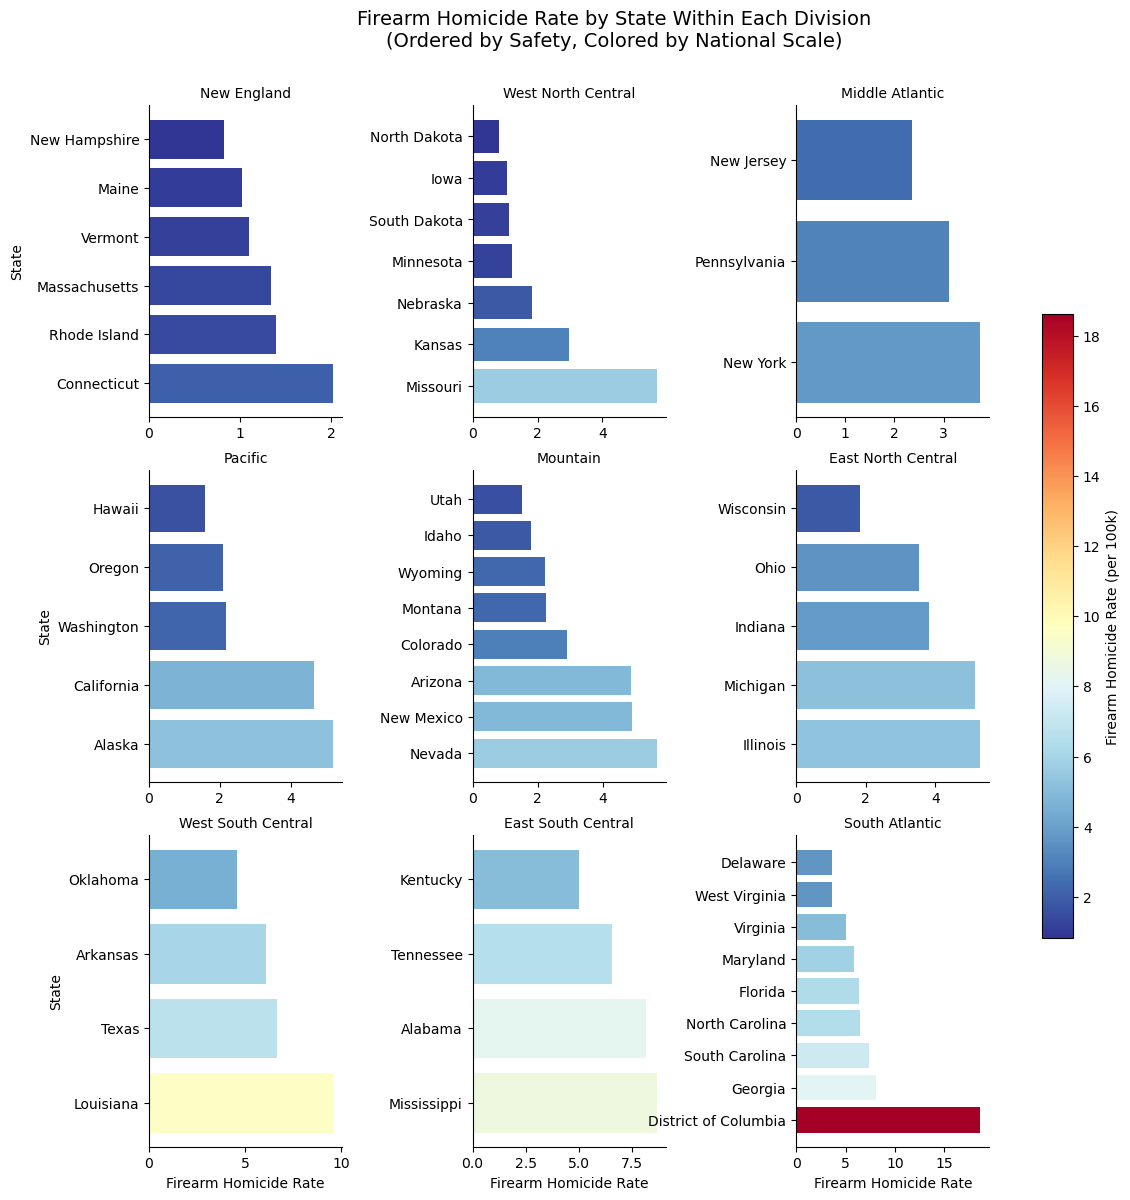

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import Normalize, to_hex
import matplotlib as mpl
import plotly.express as px

# לוודא שהעמודה מספרית
df['firearm_homicide_rate'] = pd.to_numeric(df['firearm_homicide_rate'], errors='coerce')
df['division'] = df['division'].str.title()

# ממוצע שיעור רצח לפי מדינה ואזור
state_division_avg = df.groupby(['division', 'state'], as_index=False)['firearm_homicide_rate'].mean()

# נורמליזציה אחידה
norm = Normalize(vmin=state_division_avg['firearm_homicide_rate'].min(),
                 vmax=state_division_avg['firearm_homicide_rate'].max())

cmap = plt.get_cmap('RdYlBu_r')  # ✅ הדרך התקנית
state_division_avg['color'] = state_division_avg['firearm_homicide_rate'].apply(lambda x: to_hex(cmap(norm(x))))

# סידור Divisions לפי בטיחות
division_order = (
    state_division_avg.groupby('division')['firearm_homicide_rate']
    .mean()
    .sort_values()
    .index
    .tolist()
)

# פונקציית ציור עם צבע לפי ערך מוחלט
def colored_barplot_local_xaxis(data, **kwargs):
    data = data.sort_values('firearm_homicide_rate')
    ax = plt.gca()
    for i, row in enumerate(data.itertuples()):
        ax.barh(y=i, width=row.firearm_homicide_rate, color=row.color)
    ax.set_yticks(range(len(data)))
    ax.set_yticklabels(data['state'])
    ax.invert_yaxis()

# 🔷 ציור פקד חלונות
g = sns.FacetGrid(state_division_avg, 
                  col='division', 
                  col_wrap=3, 
                  height=4, 
                  sharex=False, 
                  sharey=False,
                  col_order=division_order)

g.map_dataframe(colored_barplot_local_xaxis)
g.set_axis_labels('Firearm Homicide Rate', 'State')
g.set_titles('{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Firearm Homicide Rate by State Within Each Division\n(Ordered by Safety, Colored by National Scale)', fontsize=14)

# 🔵 הוספת Colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # חובה ל־Matplotlib
cbar = g.fig.colorbar(sm, ax=g.axes, shrink=0.6, location='right')
cbar.set_label('Firearm Homicide Rate (per 100k)')

plt.show()


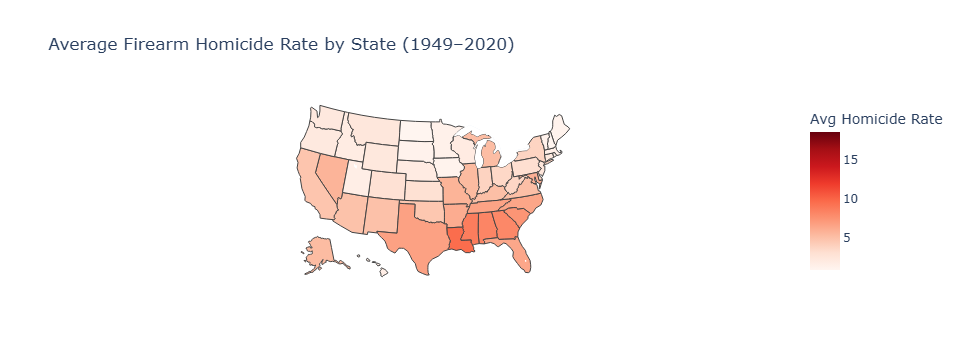

In [28]:
# מיפוי שמות מדינות לקודים
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'
}

# הוספת קוד המדינה לטבלה
state_division_avg['state_code'] = state_division_avg['state'].map(state_abbrev)

fig = px.choropleth(state_division_avg,
                    locations='state_code',
                    locationmode='USA-states',
                    color='firearm_homicide_rate',
                    scope='usa',
                    color_continuous_scale='Reds',
                    labels={'firearm_homicide_rate': 'Avg Homicide Rate'},
                    title='Average Firearm Homicide Rate by State (1949–2020)')
fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'))
fig.show()


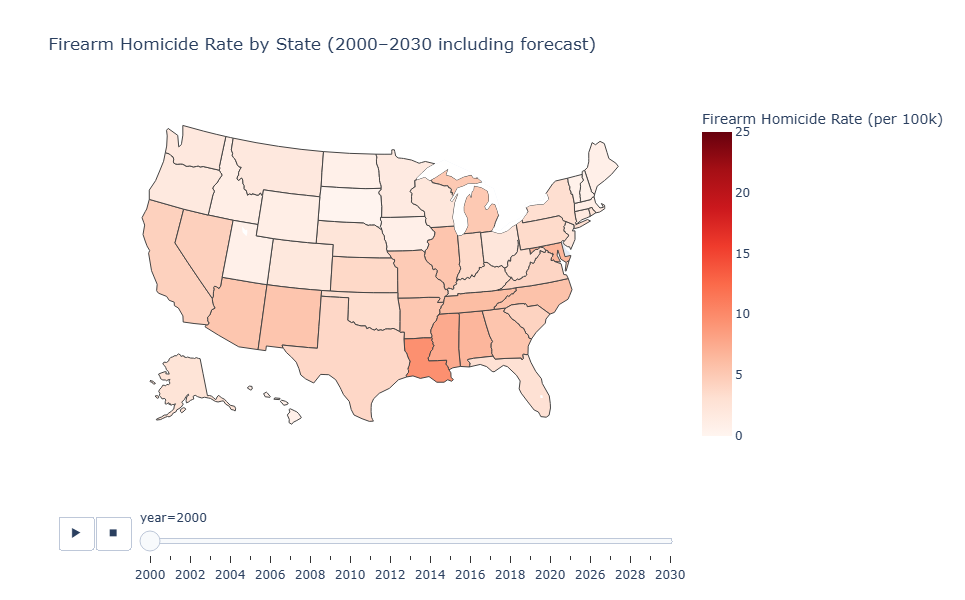

In [29]:
from sklearn.linear_model import LinearRegression
import plotly.express as px

# ניקוי עמודות
df.columns = df.columns.str.strip().str.replace(' ', '_')
df['firearm_homicide_rate'] = pd.to_numeric(df['firearm_homicide_rate'], errors='coerce')

# סינון לשנים 2000+
df = df[df['year'] >= 2000].dropna(subset=['firearm_homicide_rate'])

# תחזיות לשנים 2025 עד 2030
years_to_predict = list(range(2025, 2031))  # ⬅️ התחזית תהיה לשנים 2025–2030
predictions = []

for state in df['state'].unique():
    state_data = df[df['state'] == state]
    if len(state_data) < 5:
        continue
    X = state_data[['year']]
    y = state_data['firearm_homicide_rate']
    model = LinearRegression().fit(X, y)

    for year in years_to_predict:
        pred = model.predict(pd.DataFrame({'year': [year]}))[0]
        predictions.append({
            'state': state,
            'year': year,
            'firearm_homicide_rate': pred
        })

# יצירת DataFrame עם התחזיות
future_df = pd.DataFrame(predictions)

# איחוד עם df המקורי
df_anim = pd.concat([df[['state', 'year', 'firearm_homicide_rate']], future_df], ignore_index=True)

# מיפוי קודים למדינות
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'
}
df_anim['state_code'] = df_anim['state'].map(state_abbrev)

# מפת חום אינטראקטיבית עם אנימציה לשנים 2000–2030
fig = px.choropleth(
    df_anim,
    locations='state_code',
    locationmode='USA-states',
    color='firearm_homicide_rate',
    hover_name='state',
    animation_frame='year',
    scope='usa',
    color_continuous_scale='Reds',
    range_color=(0, 25),
    labels={'firearm_homicide_rate': 'Firearm Homicide Rate (per 100k)'},
    title='Firearm Homicide Rate by State (2000–2030 including forecast)'
)

fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    width=1000,
    height=600
)

fig.show()


<div dir="rtl">

### 🔍 סיכום הממצאים:

במסגרת ניתוח נתוני שיעורי הרצח בנשק חם בארצות הברית, התבצעו מספר הדמיות וגרפים מתוך מטרה להבין את הפערים הגיאוגרפיים לאורך השנים ולחזות מגמות עתידיות.

✅ **תחילה חושב הממוצע ההיסטורי** של שיעור הרצח לפי Division, ונמצא כי האזורים New England, West North Central ו-Middle Atlantic הם הבטוחים ביותר – עם שיעורים נמוכים משמעותית מהשאר. מנגד, אזורים כמו East South Central ו-South Atlantic מציגים שיעורי רצח גבוהים במיוחד.

📊 **גרף Boxplot** הציג את ההתפלגות הפנימית בתוך כל Division – והראה שאפילו בתוך אזורים מסוכנים, יש מדינות בטוחות יחסית (ולהפך). הפיזור הגבוה באזורים מסוימים עשוי להעיד על השפעות תרבותיות, חברתיות או חקיקתיות מקומיות.

📉 **תחזיות לשנים 2025–2030**: אומן מודל רגרסיה ליניארית לכל מדינה, כדי לחזות את שיעור הרצח הצפוי במספר נקודות זמן עתידיות. התחזיות חושפות שהפערים בין מדינות צפויים להישמר, כאשר מדינות דרומיות כמו Mississippi ו-Louisiana צפויות לשמור על שיעורי רצח גבוהים, בעוד מדינות כמו District of Columbia מציגות מגמת ירידה מובהקת מאז העשור הקודם. מדינות צפון-מזרחיות כמו Maine, New Hampshire ו-Massachusetts ממשיכות להציג רמות יציבות ובטוחות.

🗺️ **מפת חום אינטראקטיבית**: מציגה את השינויים בשיעורי הרצח בין השנים 2000–2030, ומאפשרת צפייה במגמות משתנות לאורך זמן וזיהוי מוקדי סיכון אזוריים בצורה ויזואלית ברורה.

---

🧠 **מסקנה מרכזית**:
קיימים פערים עקביים ועמוקים בין אזורים שונים בארה"ב בכל הנוגע לשיעורי רצח בנשק חם. ממצאים אלה מדגישים את החשיבות של מדיניות מותאמת-אזור, תוך הסתכלות לעתיד והיערכות מושכלת לקראת שנת 2030 ומעבר לה.

</div>
